In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
# Show the first 5 rows of city_data using .head()
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Show the first 5 rows of ride_data using .head()
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
ridership_data = pd.merge(city_data, ride_data, how='outer',on='city')

# Display the data table for preview
ridership_data

# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
typecolor_dict ={'Rural':'gold', 'Suburban':'skyblue', 'Urban': 'coral'} 

# Add a new column named 'Dot Color' 
ridership_data['type_color'] = ridership_data['type'].apply(set_value, args =(typecolor_dict, )) 
  
# Print the DataFrame 
ridership_data.head()


,city,driver_count,type,date,fare,ride_id,type_color
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794,coral
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494,coral
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416,coral
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413,coral
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850,coral


## Bubble Plot of Ride Sharing Data

In [5]:
#Split data into group based on 'city'
ridership_group = ridership_data.groupby('city')
#ridership_group.count()

In [6]:
#Split data into group based on 'type' and 'city'
#ridership_group = ridership_data.groupby('city')
#ridership_group.count()

In [7]:
#Create a new variable to hold average fare by city
ave_fare = ridership_group['fare'].mean()
ave_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [8]:
# Convert ave_fare to dataframe
#ave_fare = ave_fare.reset_index(level=['city', 'type'])
#ave_fare.head(5)

In [9]:
#Create a new variable to hold total rides per city
total_ride = ridership_group['ride_id'].count()
#total_ride

In [10]:
# Convert total_ride to dataframe
#total_ride = total_ride.reset_index(level=['city', 'type'])
#total_ride.head(5)

In [11]:
# Build the scatter plots for each city types

In [12]:
# Set the dot size
dot_size = ridership_group['driver_count'].count()
np_dot_size = np.array(dot_size)
np_dot_size = np_dot_size * 4

In [13]:
# TWO WAYS TO SET DOT COLOR; NEITHER WORK

# Set dot colors
#dot_color=ridership_group['type_color'] 
#dot_color.head()

# ALTERNATIVE WAY


#Define dot_color array to hold plot color by city type
#dot_color=[]

#Conditional to assign color to city type

#for type in ridership_data['type']:

#  if (ridership_group['type'] == 'Urban'):
#        dot_color[type] = 'coral'
   
#  elif (ridership_group['type'] == 'Suburban'):
#        dot_color[type] = 'skyblue'
        
#  elif (ridership_group['type'] == 'Rural'):
#        dot_color[type] = 'gold'




    

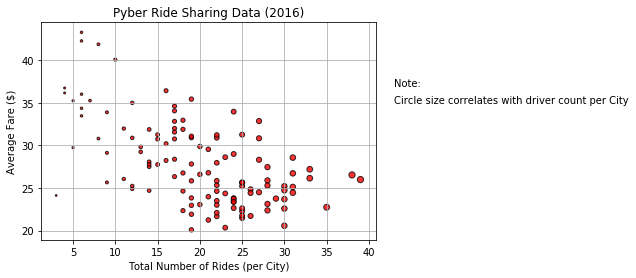

In [14]:
#Create title and lables
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')


#plt.scatter(total_ride,ave_fare, marker="o", facecolors= "red", edgecolors="black", s = dot_size, alpha=0.8)
plt.scatter(total_ride,ave_fare, marker="o", facecolors="red", edgecolors="black", s = dot_size, alpha=0.8)
plt.grid()

plt.text(43,37, 'Note:')
plt.text(43,35, 'Circle size correlates with driver count per City')
plt.savefig("image/rideshare.png")
plt.show()


## Total Fares by City Type

In [15]:
# Create a group based on the City Types:  Urban, Suburban, and Rural

ctype_group = ridership_data.groupby(['type'])
print(ctype_group)
ctype_group.count()

,city,driver_count,date,fare,ride_id,type_color
type,,,,,,
Rural,125,125,125,125,125,125
Suburban,625,625,625,625,625,625
Urban,1625,1625,1625,1625,1625,1625


In [16]:
#Create a new variable to hold total fares by city type
ctype_total_fare = ctype_group['fare'].sum()
ctype_total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

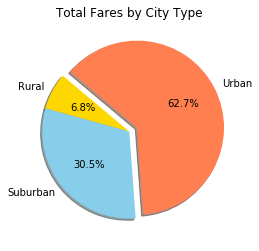

In [17]:
#Build Pie Chart of Total Fare by City Type

#Create labels
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'skyblue', 'coral']

#Separate the Urban section from the others
explode=(0,0,.1)

#Create pie charg based on ctype_total_fare variable created above
plt.pie(ctype_total_fare, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

#Create title
plt.title('Total Fares by City Type')

# Save and show the Total Fare by City Type pie chart
plt.savefig("image/totalfare.png")
plt.show()


## Total Rides by City Type

In [18]:
#Create a new variable to hold total fares by city type
ctype_total_rides = ctype_group['ride_id'].count()
ctype_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

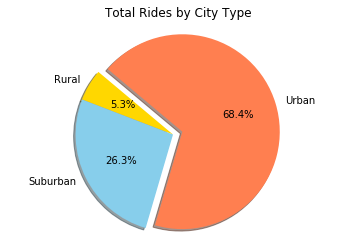

In [19]:
#Build Pie Chart of Total Rides by City Type

#Create labels
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'skyblue', 'coral']

#Separate the Urban section from the others
explode=(0,0,.1)

#Create pie charg based on ctype_total_fare variable created above
plt.pie(ctype_total_rides, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

#Plot axis equal
plt.axis('equal')

#Create title
plt.title('Total Rides by City Type')

# Save and show the Total Rides by City Type pie chart
plt.savefig("image/totalrides.png")
plt.show()

## Total Drivers by City Type

In [20]:
#Create a new variable to hold total fares by city type
ctype_total_drivers = ctype_group['driver_count'].sum()
ctype_total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

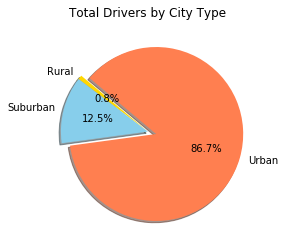

In [21]:
#Build Pie Chart of Total Drivers by City Type

#Create labels
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'skyblue', 'coral']

#Separate the Urban section from the others
explode=(0,0,.1)

#Create pie chart based on ctype_total_drivers variable created above
plt.pie(ctype_total_drivers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

#Create title
plt.title('Total Drivers by City Type')

# Save and show the Total Drivers by City Type pie chart
plt.savefig("image/totaldrivers.png")
plt.show()

In [22]:
#The average fare per ride is generally lower in urban areas than in both suburban and rural areas.  
#Cities located in Urban areas have the largest number of total rides compared to those located in suburban and rural areas.
#We can infer that more people are using public transportation in urban areas than in the other two city types.
#There are very few drivers in rural areas compared to in suburban and urban areas.
#Fares and the number of drivers are negatively correlated.
#The fewer drivers there are in an area, the higher the average fare. 